In [1]:
#Import Basic Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Basic libraries imported successfully!")

Basic libraries imported successfully!


In [2]:
#CELL 2: Load Dataset

print("LOADING DATASET")


df = pd.read_csv('Telco-Customer-Churn.csv')

print(f"\nDataset loaded successfully!")
print(f"Dataset Shape: {df.shape}")
print(f"Number of Samples: {df.shape[0]}")
print(f"Number of Features: {df.shape[1]}")

print("\nFirst 5 rows:")
df.head()

LOADING DATASET

Dataset loaded successfully!
Dataset Shape: (7043, 21)
Number of Samples: 7043
Number of Features: 21

First 5 rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Data Exploration


print("DATA EXPLORATION")
print("=" * 30)

print("\nDataset Information:")
df.info()

print("\nStatistical Summary:")
df.describe()

print("\nMissing Values:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("No missing values found!")
else:
    print(missing[missing > 0])

print("\nClass Distribution:")
print(df['Churn'].value_counts())
print("\nPercentage:")
print(df['Churn'].value_counts(normalize=True) * 100)

DATA EXPLORATION

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Pap

DATA VISUALIZATION


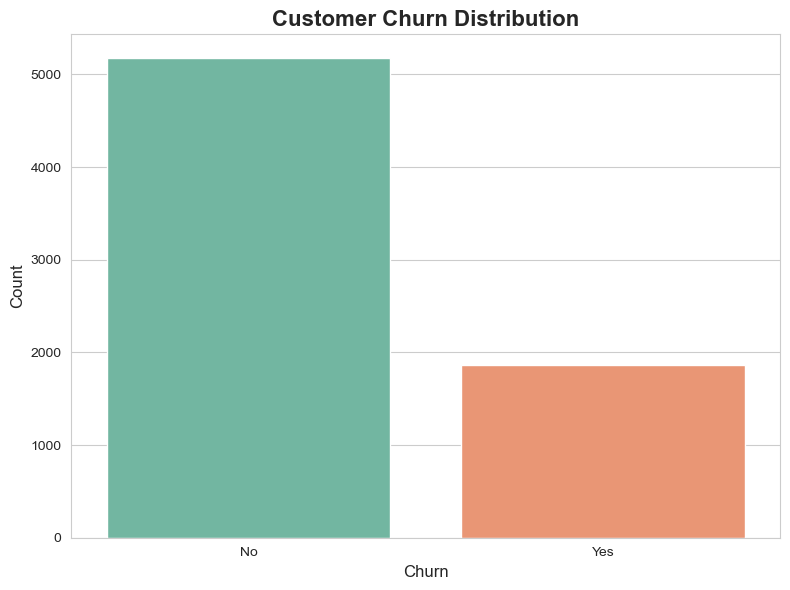

In [4]:
#Data Visualization

print("DATA VISUALIZATION")


plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title('Customer Churn Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

In [5]:
#Data Preprocessing


print("DATA PREPROCESSING")


df_processed = df.copy()

if 'customerID' in df_processed.columns:
    df_processed = df_processed.drop('customerID', axis=1)
    print("Removed customerID column")

if 'TotalCharges' in df_processed.columns:
    df_processed['TotalCharges'] = pd.to_numeric(df_processed['TotalCharges'], errors='coerce')
    df_processed['TotalCharges'].fillna(0, inplace=True)
    print("Converted TotalCharges and handled missing values")

binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    if col in df_processed.columns:
        df_processed[col] = df_processed[col].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})
print("Encoded binary variables")

categorical_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                   'Contract', 'PaymentMethod']
df_processed = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)
print("Applied one-hot encoding")

df_processed['Churn'] = df_processed['Churn'].map({'Yes': 1, 'No': 0})
print("ncoded target variable")

print(f"\nProcessed Shape: {df_processed.shape}")
print(f"Features: {df_processed.shape[1] - 1}")


DATA PREPROCESSING
Removed customerID column
Converted TotalCharges and handled missing values
Encoded binary variables
Applied one-hot encoding
ncoded target variable

Processed Shape: (7043, 31)
Features: 30


In [6]:
#Train-Test Split and Scaling (SHARED FOR ALL MODELS)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

print("TRAIN-TEST SPLIT AND SCALING")


# Separate features and target
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Train-Test Split
print("\n1. Splitting data...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"   Training set: {X_train.shape[0]} samples")
print(f"   Test set: {X_test.shape[0]} samples")

# Feature Scaling
print("\n2. Scaling features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("   StandardScaler applied")

# Save scaler and feature names for later use
with open('scaler.joblib', 'wb') as f:
    pickle.dump(scaler, f)
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(X.columns.tolist(), f)
print("   Scaler and feature names saved")

print("\nTrain-test split and scaling completed!")
print("   All models will use the same splits and scaling")

TRAIN-TEST SPLIT AND SCALING

Features shape: (7043, 30)
Target shape: (7043,)

1. Splitting data...
   Training set: 5634 samples
   Test set: 1409 samples

2. Scaling features...
   StandardScaler applied
   Scaler and feature names saved

Train-test split and scaling completed!
   All models will use the same splits and scaling


In [7]:

#Train ANN Model () - Import Libraries

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

print("ANN libraries imported!")

# Train ANN Model
print("\n Training ANN model...")
ann_model = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

ann_model.fit(X_train_scaled, y_train)
print("   Training completed!")

# Predictions
y_pred_ann = ann_model.predict(X_test_scaled)
y_pred_proba_ann = ann_model.predict_proba(X_test_scaled)[:, 1]


ANN libraries imported!

 Training ANN model...
   Training completed!


In [8]:
#ANN Model - Evaluation Metrics

print("ANN MODEL - CLASSIFICATION METRICS")

ann_accuracy = accuracy_score(y_test, y_pred_ann)
ann_precision = precision_score(y_test, y_pred_ann)
ann_recall = recall_score(y_test, y_pred_ann)
ann_f1 = f1_score(y_test, y_pred_ann)
ann_auc = roc_auc_score(y_test, y_pred_proba_ann)

print(f"\nAccuracy:  {ann_accuracy:.4f}")
print(f"Precision: {ann_precision:.4f}")
print(f"Recall:    {ann_recall:.4f}")
print(f"F1-Score:  {ann_f1:.4f}")
print(f"AUC-ROC:   {ann_auc:.4f}")

ANN MODEL - CLASSIFICATION METRICS

Accuracy:  0.7502
Precision: 0.5304
Recall:    0.5134
F1-Score:  0.5217
AUC-ROC:   0.7738



Generating ANN confusion matrix...


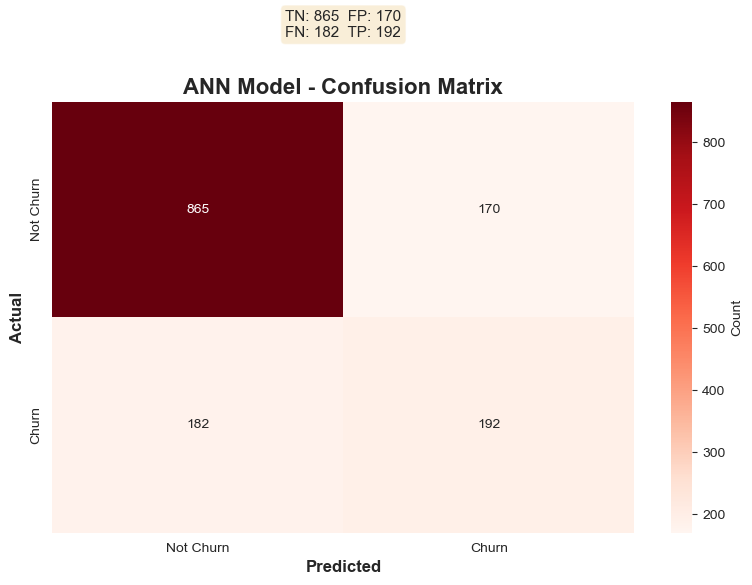


True Negatives:  865
False Positives: 170
False Negatives: 182
True Positives:  192


In [9]:
#ANN Model - Confusion Matrix

print("\nGenerating ANN confusion matrix...")

cm_ann = confusion_matrix(y_test, y_pred_ann)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'],
            cbar_kws={'label': 'Count'})
plt.title('ANN Model - Confusion Matrix', fontsize=16, fontweight='bold')
plt.ylabel('Actual', fontsize=12, fontweight='bold')
plt.xlabel('Predicted', fontsize=12, fontweight='bold')

# Add statistics
tn, fp, fn, tp = cm_ann.ravel()
stats_text = f'TN: {tn}  FP: {fp}\nFN: {fn}  TP: {tp}'
plt.text(1, -0.3, stats_text, fontsize=11, ha='center', 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print(f"\nTrue Negatives:  {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives:  {tp}")


📊 Generating ANN ROC curve...


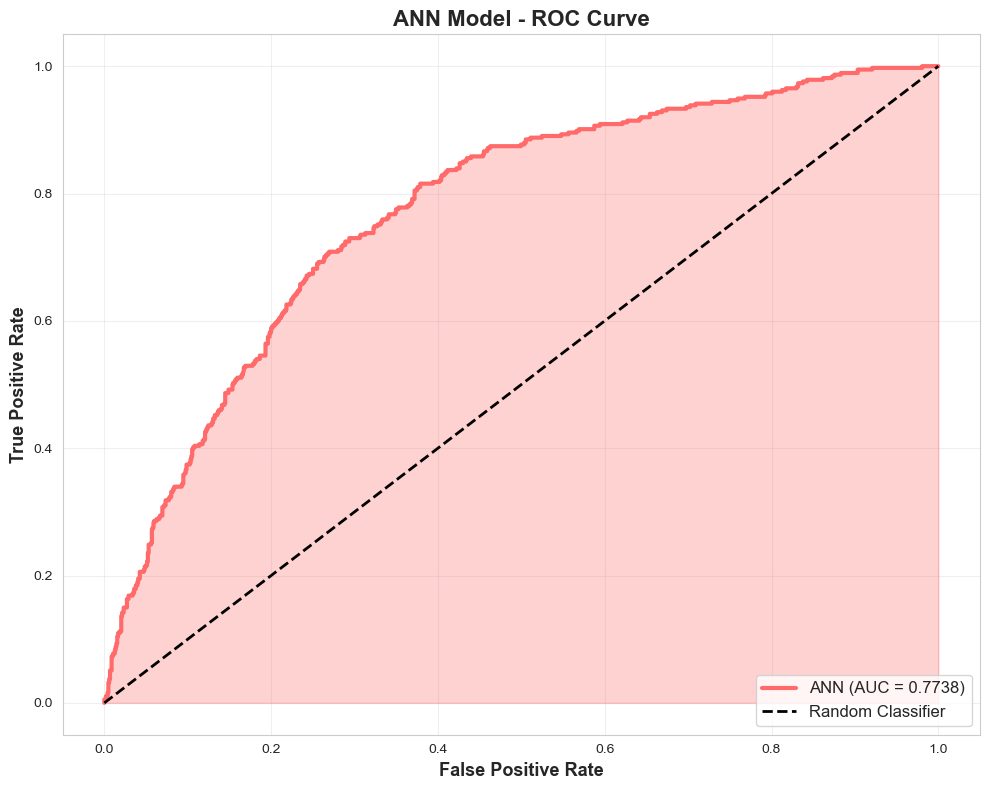

In [10]:

#ANN Model - ROC Curve

print("\n📊 Generating ANN ROC curve...")

fpr_ann, tpr_ann, thresholds_ann = roc_curve(y_test, y_pred_proba_ann)

plt.figure(figsize=(10, 8))
plt.plot(fpr_ann, tpr_ann, color='#FF6B6B', linewidth=3, 
         label=f'ANN (AUC = {ann_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier')

plt.fill_between(fpr_ann, tpr_ann, alpha=0.3, color='#FF6B6B')

plt.xlabel('False Positive Rate', fontsize=13, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=13, fontweight='bold')
plt.title('ANN Model - ROC Curve', fontsize=16, fontweight='bold')
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



Generating ANN training loss curve...


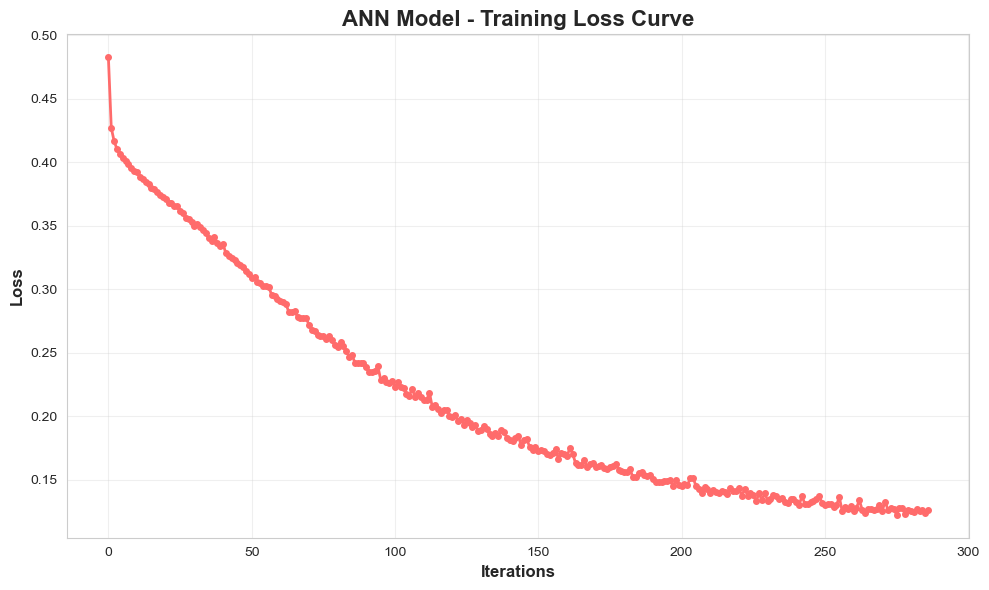

In [11]:
#ANN Model - Training Loss Curve

print("\nGenerating ANN training loss curve...")

plt.figure(figsize=(10, 6))
plt.plot(ann_model.loss_curve_, color='#FF6B6B', linewidth=2, marker='o', markersize=4)
plt.xlabel('Iterations', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')
plt.title('ANN Model - Training Loss Curve', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [12]:
#Save ANN Model

with open('ann_model.keras', 'wb') as f:
    pickle.dump(ann_model, f)
print("\nANN model saved to 'ann_model.keras'")



ANN model saved to 'ann_model.keras'


In [13]:
#Train SVM Model (Loo Han Sheng) - Import Libraries

from sklearn.svm import SVC

print("✅ SVM libraries imported!")

#Train SVM Model
print("\nTraining SVM model...")
svm_model = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    probability=True,
    random_state=42
)

svm_model.fit(X_train_scaled, y_train)
print("    Training completed!")

# Predictions
y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

✅ SVM libraries imported!

Training SVM model...
    Training completed!


In [14]:
#Evaluation Metrics

print("SVM MODEL - CLASSIFICATION METRICS")

svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)
svm_auc = roc_auc_score(y_test, y_pred_proba_svm)

print(f"\nAccuracy:  {svm_accuracy:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall:    {svm_recall:.4f}")
print(f"F1-Score:  {svm_f1:.4f}")
print(f"AUC-ROC:   {svm_auc:.4f}")

SVM MODEL - CLASSIFICATION METRICS

Accuracy:  0.7928
Precision: 0.6444
Recall:    0.4893
F1-Score:  0.5562
AUC-ROC:   0.7961



 Generating SVM confusion matrix...


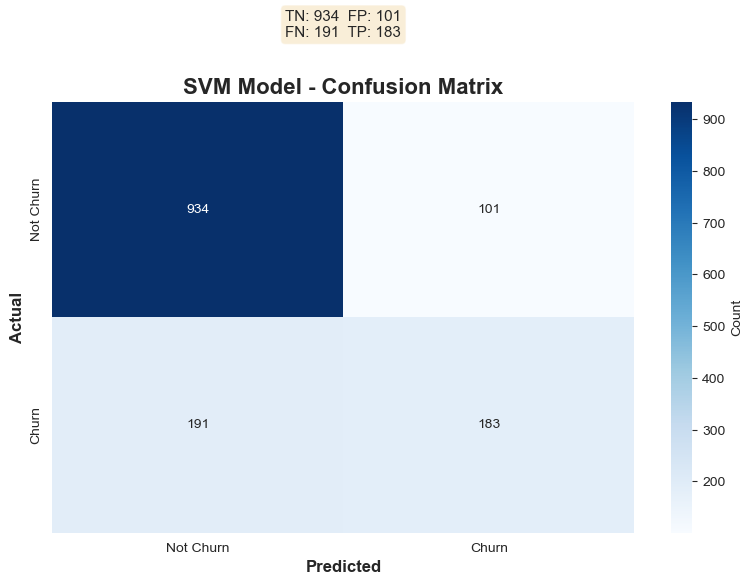


True Negatives:  934
False Positives: 101
False Negatives: 191
True Positives:  183


In [15]:
# SVM Model - Confusion Matrix

print("\n Generating SVM confusion matrix...")

cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'],
            cbar_kws={'label': 'Count'})
plt.title('SVM Model - Confusion Matrix', fontsize=16, fontweight='bold')
plt.ylabel('Actual', fontsize=12, fontweight='bold')
plt.xlabel('Predicted', fontsize=12, fontweight='bold')

tn, fp, fn, tp = cm_svm.ravel()
stats_text = f'TN: {tn}  FP: {fp}\nFN: {fn}  TP: {tp}'
plt.text(1, -0.3, stats_text, fontsize=11, ha='center', 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print(f"\nTrue Negatives:  {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives:  {tp}")



Generating SVM ROC curve...


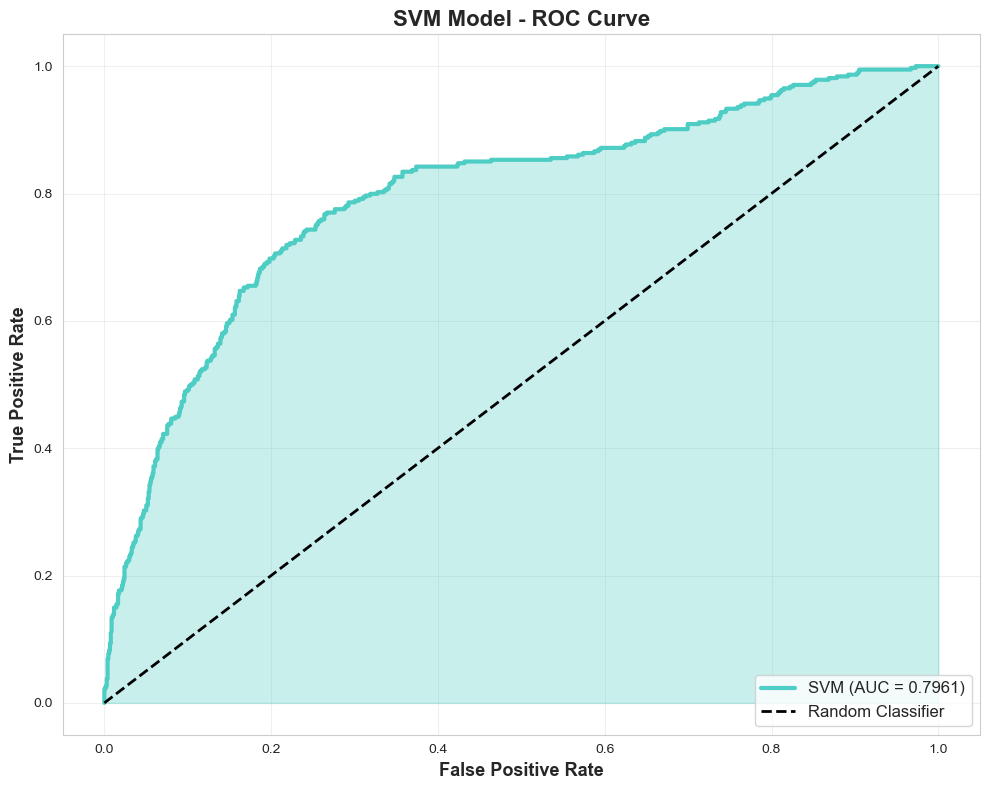

In [16]:
# SVM Model - ROC Curve

print("\nGenerating SVM ROC curve...")

fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_proba_svm)

plt.figure(figsize=(10, 8))
plt.plot(fpr_svm, tpr_svm, color='#4ECDC4', linewidth=3, 
         label=f'SVM (AUC = {svm_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier')

plt.fill_between(fpr_svm, tpr_svm, alpha=0.3, color='#4ECDC4')

plt.xlabel('False Positive Rate', fontsize=13, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=13, fontweight='bold')
plt.title('SVM Model - ROC Curve', fontsize=16, fontweight='bold')
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



Generating SVM Precision-Recall curve...


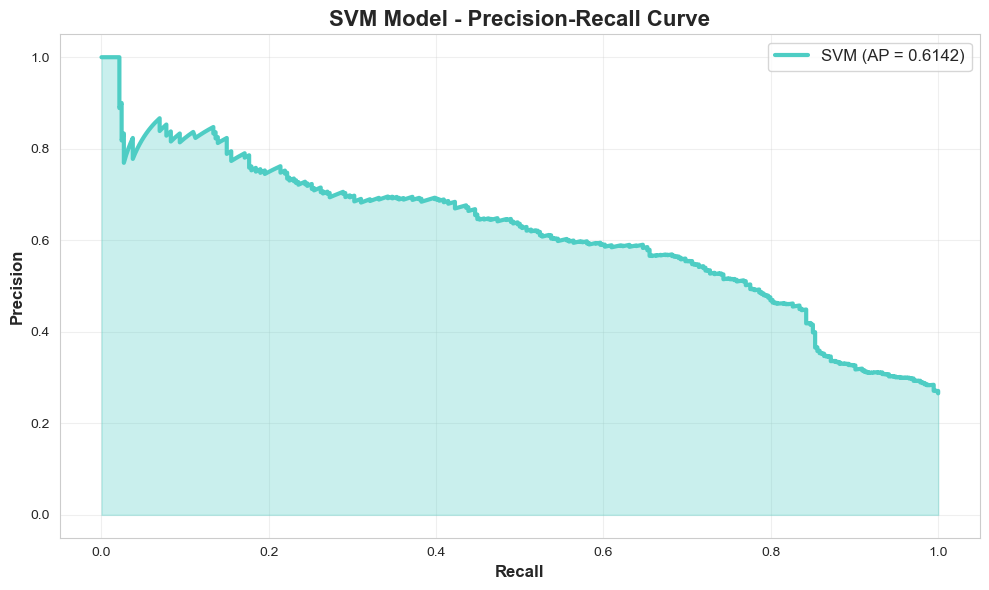

In [17]:
#SVM Model - Precision-Recall Curve

from sklearn.metrics import precision_recall_curve, average_precision_score

print("\nGenerating SVM Precision-Recall curve...")

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_svm)
avg_precision = average_precision_score(y_test, y_pred_proba_svm)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='#4ECDC4', linewidth=3, 
         label=f'SVM (AP = {avg_precision:.4f})')
plt.fill_between(recall, precision, alpha=0.3, color='#4ECDC4')
plt.xlabel('Recall', fontsize=12, fontweight='bold')
plt.ylabel('Precision', fontsize=12, fontweight='bold')
plt.title('SVM Model - Precision-Recall Curve', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [18]:
#Save SVM Model

with open('svm_model.joblib', 'wb') as f:
    pickle.dump(svm_model, f)
print("\n✓ SVM model saved to 'svm_model.joblib'")


✓ SVM model saved to 'svm_model.joblib'


In [19]:
#rain KNN Model () - Import Libraries

from sklearn.neighbors import KNeighborsClassifier

print("KNN libraries imported!")

# Train KNN Model
print("\n1. Training KNN model...")
knn_model = KNeighborsClassifier(
    n_neighbors=5,
    weights='distance',
    metric='euclidean'
)

knn_model.fit(X_train_scaled, y_train)
print("   ✓ Training completed!")

# Predictions
y_pred_knn = knn_model.predict(X_test_scaled)
y_pred_proba_knn = knn_model.predict_proba(X_test_scaled)[:, 1]

KNN libraries imported!

1. Training KNN model...
   ✓ Training completed!


In [20]:
#KNN Model - Evaluation Metrics

print("KNN MODEL - CLASSIFICATION METRICS")


knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)
knn_auc = roc_auc_score(y_test, y_pred_proba_knn)

print(f"\nAccuracy:  {knn_accuracy:.4f}")
print(f"Precision: {knn_precision:.4f}")
print(f"Recall:    {knn_recall:.4f}")
print(f"F1-Score:  {knn_f1:.4f}")
print(f"AUC-ROC:   {knn_auc:.4f}")

KNN MODEL - CLASSIFICATION METRICS

Accuracy:  0.7466
Precision: 0.5241
Recall:    0.4947
F1-Score:  0.5089
AUC-ROC:   0.7593



Generating KNN confusion matrix...


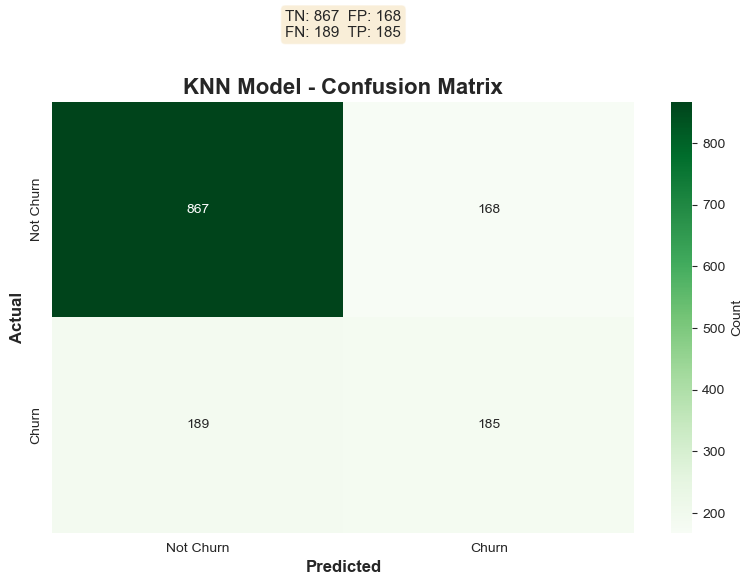


True Negatives:  867
False Positives: 168
False Negatives: 189
True Positives:  185


In [21]:
#Confusion Matrix
print("\nGenerating KNN confusion matrix...")

cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'],
            cbar_kws={'label': 'Count'})
plt.title('KNN Model - Confusion Matrix', fontsize=16, fontweight='bold')
plt.ylabel('Actual', fontsize=12, fontweight='bold')
plt.xlabel('Predicted', fontsize=12, fontweight='bold')

tn, fp, fn, tp = cm_knn.ravel()
stats_text = f'TN: {tn}  FP: {fp}\nFN: {fn}  TP: {tp}'
plt.text(1, -0.3, stats_text, fontsize=11, ha='center', 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print(f"\nTrue Negatives:  {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives:  {tp}")


Generating KNN ROC curve...


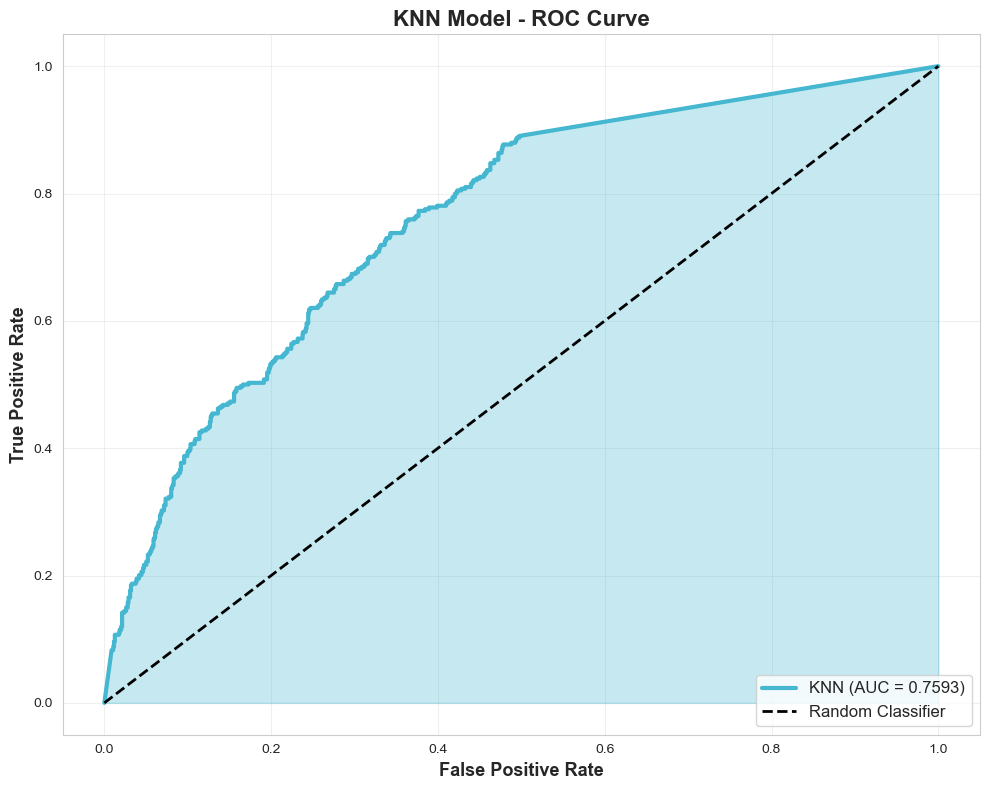

In [22]:

#KNN Model - ROC Curve

print("\nGenerating KNN ROC curve...")

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_knn)

plt.figure(figsize=(10, 8))
plt.plot(fpr_knn, tpr_knn, color='#45B7D1', linewidth=3, 
         label=f'KNN (AUC = {knn_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier')

plt.fill_between(fpr_knn, tpr_knn, alpha=0.3, color='#45B7D1')

plt.xlabel('False Positive Rate', fontsize=13, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=13, fontweight='bold')
plt.title('KNN Model - ROC Curve', fontsize=16, fontweight='bold')
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



Generating KNN K-value analysis...


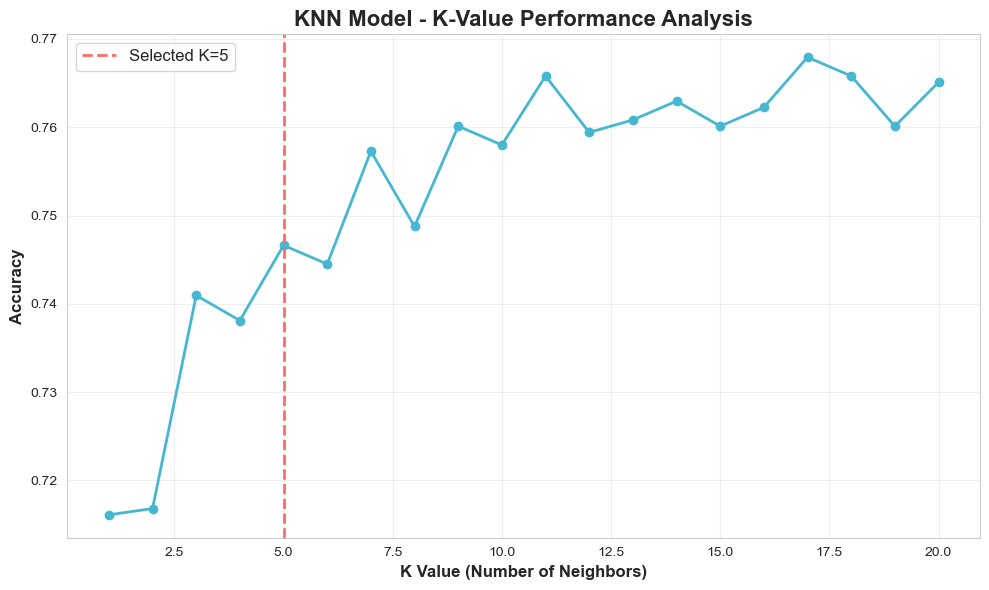

In [23]:
# CELL 26: KNN Model - K-Value Performance Analysis

print("\nGenerating KNN K-value analysis...")

k_values = range(1, 21)
k_scores = []
for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='euclidean')
    knn_temp.fit(X_train_scaled, y_train)
    score = knn_temp.score(X_test_scaled, y_test)
    k_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(k_values, k_scores, color='#45B7D1', linewidth=2, marker='o', markersize=6)
plt.axvline(x=5, color='#FF6B6B', linestyle='--', linewidth=2, label='Selected K=5')
plt.xlabel('K Value (Number of Neighbors)', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.title('KNN Model - K-Value Performance Analysis', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [24]:
#Save KNN Model

with open('knn_model.joblib', 'wb') as f:
    pickle.dump(knn_model, f)
print("\nKNN model saved to 'knn_model.joblib'")



KNN model saved to 'knn_model.joblib'


In [25]:

#Final Comparison


print("FINAL COMPARISON - ALL MODELS")


results = {
    'ANN': {
        'Accuracy': ann_accuracy,
        'Precision': ann_precision,
        'Recall': ann_recall,
        'F1-Score': ann_f1,
        'AUC-ROC': ann_auc
    },
    'SVM': {
        'Accuracy': svm_accuracy,
        'Precision': svm_precision,
        'Recall': svm_recall,
        'F1-Score': svm_f1,
        'AUC-ROC': svm_auc
    },
    'KNN': {
        'Accuracy': knn_accuracy,
        'Precision': knn_precision,
        'Recall': knn_recall,
        'F1-Score': knn_f1,
        'AUC-ROC': knn_auc
    }
}

results_df = pd.DataFrame(results).T
print("\n", results_df)

FINAL COMPARISON - ALL MODELS

      Accuracy  Precision    Recall  F1-Score   AUC-ROC
ANN  0.750177   0.530387  0.513369  0.521739  0.773805
SVM  0.792761   0.644366  0.489305  0.556231  0.796125
KNN  0.746629   0.524079  0.494652  0.508941  0.759301



 Generating overall model comparison...


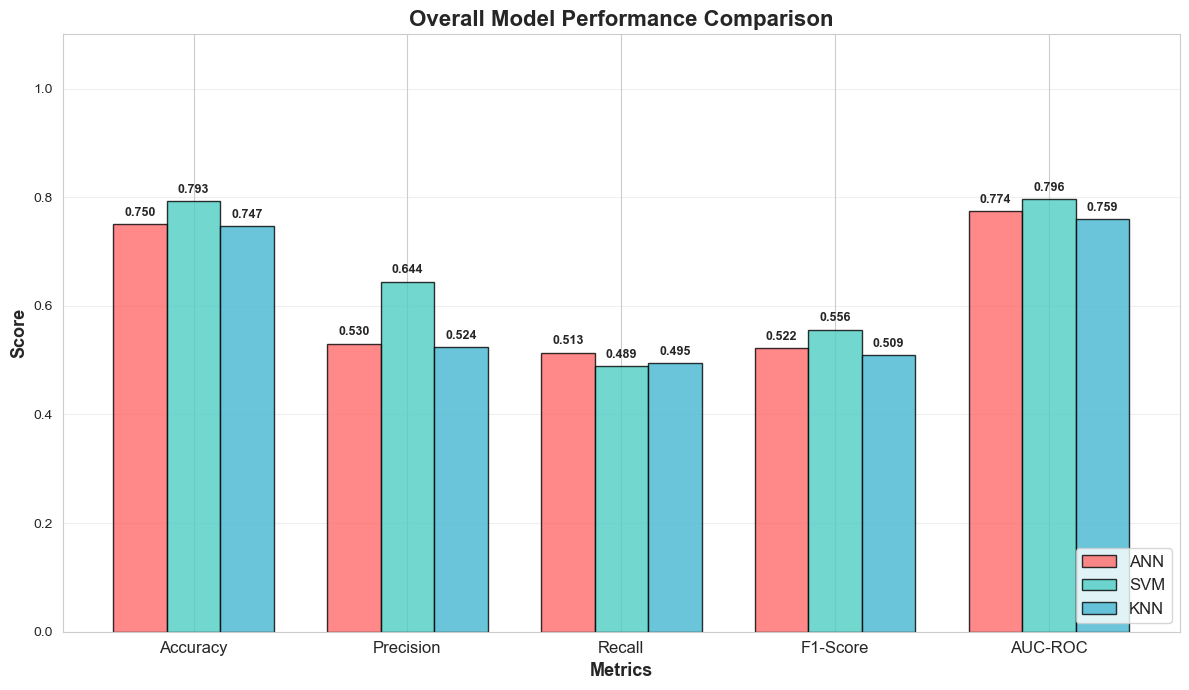

BEST MODELS BY METRIC
Best F1-Score:  SVM (0.5562)
Best AUC-ROC:   SVM (0.7961)
Best Accuracy:  SVM (0.7928)


In [26]:
# Model Comparison Visualization

print("\n Generating overall model comparison...")

# Overall Performance Comparison - Bar Chart
fig, ax = plt.subplots(figsize=(12, 7))

models = ['ANN', 'SVM', 'KNN']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']

x = np.arange(len(metrics))
width = 0.25

for i, (model, color) in enumerate(zip(models, colors)):
    values = [results[model][metric] for metric in metrics]
    bars = ax.bar(x + i*width, values, width, label=model, color=color, alpha=0.8, edgecolor='black')
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

ax.set_xlabel('Metrics', fontsize=13, fontweight='bold')
ax.set_ylabel('Score', fontsize=13, fontweight='bold')
ax.set_title('Overall Model Performance Comparison', fontsize=16, fontweight='bold')
ax.set_xticks(x + width)
ax.set_xticklabels(metrics, fontsize=12)
ax.legend(fontsize=12, loc='lower right')
ax.set_ylim([0, 1.1])
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Find and highlight best model
best_f1_model = max(results, key=lambda x: results[x]['F1-Score'])
best_auc_model = max(results, key=lambda x: results[x]['AUC-ROC'])
best_acc_model = max(results, key=lambda x: results[x]['Accuracy'])


print("BEST MODELS BY METRIC")

print(f"Best F1-Score:  {best_f1_model} ({results[best_f1_model]['F1-Score']:.4f})")
print(f"Best AUC-ROC:   {best_auc_model} ({results[best_auc_model]['AUC-ROC']:.4f})")
print(f"Best Accuracy:  {best_acc_model} ({results[best_acc_model]['Accuracy']:.4f})")